In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
class ScratchDecesionTreeClassifierDepth1:
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose

    def _gini(self, y):
        s = 0.0
        values, counts = np.unique(y, return_counts=True)
        for v, c in zip(values, counts):
            s += (c / len(y)) ** 2
        return 1 - s

    def _calc_ig(self, X, feature_index, y, threshold):
        left_y = y[X[:, feature_index] < threshold]
        right_y = y[X[:, feature_index] >= threshold]
        gain_l = (len(left_y) / (len(left_y) + len(right_y))) * self._gini(left_y)
        gain_r = (len(right_y) / (len(left_y) + len(right_y))) * self._gini(right_y)
        gain = self._gini(y) - gain_l - gain_r
        return gain

    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        best_gain = 0.0
        for f_i in range(X.shape[1]):
            for t in np.unique(X[:, f_i]):
                g = self._calc_ig(X, f_i, y, t)
                if g > best_gain:
                    best_gain = g
                    self.gain = g
                    self.feature = f_i
                    self.threshold = t
                    # 最頻値を分類出力ラベルとする
                    left = y[X[:, f_i] < t]
                    right = y[X[:, f_i] >= t]
                    values, counts = np.unique(left, return_counts=True)
                    left_mode = values[counts == np.max(counts)][0]
                    values, counts = np.unique(right, return_counts=True)
                    right_mode = values[counts == np.max(counts)][0]
                    self.left_label = left_mode
                    self.right_label = right_mode
                    # verboseをTrueにした際は学習過程を出力
                    if self.verbose:
                        print(f"Update feature={f_i} threshold={t} gain={g}")

    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        return np.where(X[:, self.feature] < self.threshold, self.left_label, self.right_label)

### 学習を行う

In [31]:
from sklearn.model_selection import train_test_split

# Sample data 2
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
              [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
              [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
              [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
              [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
              [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
              [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
              [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
              [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
              [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
              [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
              [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
              [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
              [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
              [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
              [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
              [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
              [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
              [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
              [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])

y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
clf = ScratchDecesionTreeClassifierDepth1(verbose=True)
clf.fit(X_train, y_train)

Update feature=0 threshold=-4.1013 gain=0.021258503401360596
Update feature=0 threshold=-3.0603 gain=0.030368234250221893
Update feature=0 threshold=-0.12243 gain=0.038319873403907134
Update feature=0 threshold=0.96765 gain=0.04415227629513341
Update feature=1 threshold=-3.6461 gain=0.05173469387755103
Update feature=1 threshold=-0.75345 gain=0.055510800811552685
Update feature=1 threshold=-0.31818 gain=0.07760770975056702
Update feature=1 threshold=2.4023 gain=0.08950398341154653
Update feature=1 threshold=4.3439 gain=0.09310478577395874
Update feature=1 threshold=5.3524 gain=0.13494897959183672


In [33]:
# 学習した分割方法
clf.feature, clf.threshold

(1, 5.3524)

In [34]:
import sklearn.metrics

y_pred = clf.predict(X_test)
# 指標値を計算
print("Accuracy", sklearn.metrics.accuracy_score(y_test, y_pred))
print("Precision", sklearn.metrics.precision_score(y_test, y_pred))
print("Recall", sklearn.metrics.recall_score(y_test, y_pred))
print("F1-Score", sklearn.metrics.f1_score(y_test, y_pred))
print(sklearn.metrics.confusion_matrix(y_test, y_pred))
# 結果も確認
print(list(y_test))
print(list(y_pred))

Accuracy 0.5
Precision 0.6666666666666666
Recall 0.2857142857142857
F1-Score 0.4
[[4 1]
 [5 2]]
[1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1]
[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]


### Scikit-learn と比較

In [35]:
# 決定木
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(max_depth=1)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)
print("Accuracy", sklearn.metrics.accuracy_score(y_test, y_pred2))
print("Precision", sklearn.metrics.precision_score(y_test, y_pred2))
print("Recall", sklearn.metrics.recall_score(y_test, y_pred2))
print("F1-Score", sklearn.metrics.f1_score(y_test, y_pred2))
print(sklearn.metrics.confusion_matrix(y_test, y_pred2))
# 結果も確認
print(list(y_test))
print(list(y_pred2))

Accuracy 0.5
Precision 0.6666666666666666
Recall 0.2857142857142857
F1-Score 0.4
[[4 1]
 [5 2]]
[1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1]
[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]


### 決定領域の可視化

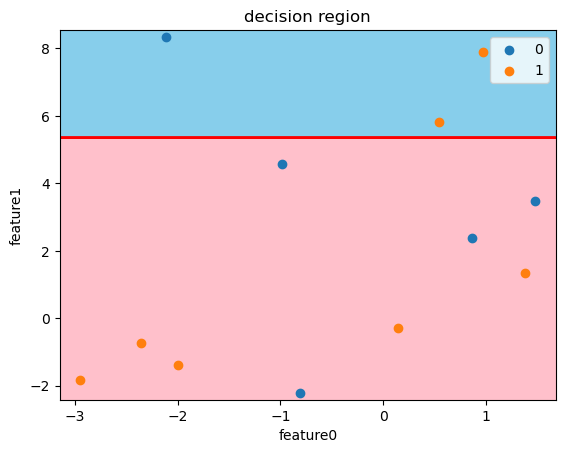

In [36]:
# 可視化
from matplotlib.colors import ListedColormap
def decision_region(X, y, model):
    mesh_f0, mesh_f1  = np.meshgrid(
        np.arange(np.min(X[:,0]) - 0.2, np.max(X[:,0]) + 0.2, 0.002),
        np.arange(np.min(X[:,1]) - 0.2, np.max(X[:,1]) + 0.2, 0.002)
    )
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    plt.title('decision region')
    plt.xlabel('feature0')
    plt.ylabel('feature1')
    plt.contourf(mesh_f0, mesh_f1, y_pred,cmap=ListedColormap(['pink', 'skyblue']))
    plt.contour(mesh_f0, mesh_f1, y_pred,colors='red')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1],label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1],label='1')
    plt.legend()
    plt.show()
decision_region(X_test, y_test, clf)

### 深さに制限のない決定木分類器クラスの作成

深さ2の決定木分類器クラスの作成

In [ ]:
class ScratchDecesionTreeClassifierDepthInf:
    """
    任意の深さの決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, depth=None, verbose=False):
        # ハイパーパラメータを属性として記録
        self.depth = depth
        self.verbose = verbose

    def _gini(self, y):
        s = 0.0
        values, counts = np.unique(y, return_counts=True)
        for v, c in zip(values, counts):
            s += (c / len(y)) ** 2
        return 1 - s

    def _calc_ig(self, X, feature_index, y, threshold):
        left_y = y[X[:, feature_index] < threshold]
        right_y = y[X[:, feature_index] >= threshold]
        gain_l = (len(left_y) / (len(left_y) + len(right_y))) * self._gini(left_y)
        gain_r = (len(right_y) / (len(left_y) + len(right_y))) * self._gini(right_y)
        gain = self._gini(y) - gain_l - gain_r
        return gain

    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        best_gain = 0.0
        for f_i in range(X.shape[1]):
            for t in np.unique(X[:, f_i]):
                g = self._calc_ig(X, f_i, y, t)
                if g > best_gain:
                    best_gain = g
                    self.gain = g
                    self.feature = f_i
                    self.threshold = t
                    # 最頻値を分類出力ラベルとする
                    left = y[X[:, f_i] < t]
                    right = y[X[:, f_i] >= t]
                    values, counts = np.unique(left, return_counts=True)
                    left_mode = values[counts == np.max(counts)][0]
                    values, counts = np.unique(right, return_counts=True)
                    right_mode = values[counts == np.max(counts)][0]
                    self.left_label = left_mode
                    self.right_label = right_mode
                    # verboseをTrueにした際は学習過程を出力
                    if self.verbose:
                        print(f"Update feature={f_i} threshold={t} gain={g}")

    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        return np.where(X[:, self.feature] < self.threshold, self.left_label, self.right_label)